In [126]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('dados.csv')  

df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Distribuições de Probabilidade

#### Distribuição Binomial

Um evento binomial é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de sucesso e fracasso.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso

#### Experimento Binomial

1. Realização de $n$ ensaios idênticos.

2. Os ensaios são independentes.

3. Somente dois resultados são possíveis, exemplo: Verdadeiro ou falso; Cara ou coroa; Sucesso ou fracasso.

4. A probabilidade de sucesso é representada por $p$ e a de fracasso por $1-p=q$. Estas probabilidades não se modificam de ensaio para ensaio.

#### Combinações

Número de combinações de $n$ objetos, tomados $k$ a cada vez, é:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Onde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definição

## $$0! = 1$$

#### Exemplo combinação: Mega Sena

Em um volante de loteria da Mega Sena temos um total de **60 números** para escolher onde a aposta mínima é de **seis números**. Você que é curiosa(o) resolve calcular a probabilidade de se acertar na Mega Sena com apenas **um jogo**. Para isso precisamos saber quantas **combinações de seis números podem ser formadas com os 60 números disponíveis**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [128]:
from scipy.special import comb

combinacoes = comb(60, 6)
combinacoes

50063860.0

In [129]:
probabilidade = 1 / combinacoes

print('%0.15f' % probabilidade)

0.000000019974489


Suponha que acabamos de criar um jogo de loteria, chamado Show de prêmios da Alura. Neste nosso novo jogo, o apostador marca 20 números, dentre os 25 disponíveis no bilhete, e pode ganhar até 1 milhão de reais.

Determine qual o número de combinações possíveis (espaço amostral) e a probabilidade de se ganhar o prêmio jogando apenas um bilhete (considere apenas quinze casas decimais).

In [130]:
combinacoes = comb(25, 20)
combinacoes

53130.0

In [131]:
probabilidade = 1 / combinacoes
print('%0.15f' % probabilidade)

0.000018821757952


Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

In [132]:
# Número de ensaios

n = 10
n

10

In [133]:
# Probabilidade de sucesso

numeroAlternativasPorQuestao = 3 
p = 1 / numeroAlternativasPorQuestao
p

0.3333333333333333

In [134]:
# Probabilidade de fracasso

q = 1 - p
q

0.6666666666666667

In [135]:
# Total de eventos que se deseja obter sucesso

k = 5

k

5

In [136]:
probabilidade = (comb(n, k ) * (p ** k) * (q ** (n-k)))
print('%0.8f' % probabilidade)

0.13656455


In [137]:
# Automatizado

from scipy.stats import binom

probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.13656455


### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P10)$$

In [138]:
# Probabilidade do candidato passar

binom.pmf([5,6,7,8,9,10], n, p).sum()

0.21312808006909525

In [139]:
binom.sf(4, n, p)

0.21312808006909517

Uma moeda, perfeitamente equilibrada, é lançada para o alto quatro vezes. Utilizando a distribuição binomial, obtenha a probabilidade de a moeda cair com a face coroa voltada para cima duas vezes.

In [140]:
n = 4
p = 1/2
q = 1 - p
k = 2

probabilidade = binom.pmf(k, n, p)
print('%0.4f' % probabilidade)

0.3750


Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a **proporção de participantes do sexo feminino foi de 60%**. **O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30**. Com as informações acima responda: Quantas equipes deverão ser formadas por **8 mulheres**?

In [141]:
n = 12
p = 0.6
q = 1 - p
k = 8

probabilidade = binom.pmf(k, n, p)
print('%0.5f' % probabilidade)

0.21284


Porém, queremos saber quantas dessas 30 equipes serão formadas com esta configuração, então n passará a ser 30.
Para isso, usaremos o conceito da Média de Distribuição Binomial, cuja fórmula é μ igual a n vezes esta probabilidade p de termos 8 mulheres na equipe.

In [142]:
equipes = 30 * probabilidade
round(equipes, 3)

6.385

### Média da distribuição binomial

O valor esperado ou a média da distribuição binomial é igual ao número de experimentos realizados multiplicado pela chance de ocorrência do evento.

# $$\mu = n \times p$$

Suponha que a probabilidade de um casal ter filhos com olhos azuis seja de 22%. Em 50 famílias, com 3 crianças cada uma, quantas podemos esperar que tenham dois filhos com olhos azuis?

In [143]:
n = 3
p = 0.22
q = 1 - p
k = 2

probabilidade = binom.pmf(k, n, p)
print('%0.5f' % probabilidade)

0.11326


In [144]:
50 * probabilidade

5.662799999999999

#### Distribuição Poisson

É empregada para descrever o número de ocorrências em um intervalo de tempo ou espaço específico. Os eventos são caracterizados pela possibilidade de contagem dos sucessos, mas a não possibilidade de contagem dos fracassos.

Como exemplos de processos onde podemos aplicar a distribuição de Poisson temos a determinação do número de clientes que entram em uma loja em determinada hora, o número de carros que chegam em um drive-thru de uma lanchonete na hora do almoço, a determinação do número de acidentes registrados em um trecho de estrada etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$k$ = número de sucessos no intervalo desejado

#### Experimento Poisson

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.

2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.

3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.

#### Média da distribuição Poisson

# $$\mu$$

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

In [145]:
# número médio de ocorrências por hora ( 𝜇 )

media = 20
media

20

In [146]:
# número de ocorrências que queremos obter no período ( 𝑘 )

k = 15
k

15

In [147]:
# Solução manual

probabilidade = (np.e ** (-media)) * (media ** k) / (np.math.factorial(k))

round(probabilidade, 8) * 100

5.164885

In [148]:
from scipy.stats import poisson

probabilidade =  poisson.pmf(k, media)
round(probabilidade, 8) * 100

5.164885

O número médio de clientes que entram em uma padaria por hora é igual a 20. Obtenha a probabilidade de, na próxima hora, entrarem exatamente 25 clientes.

In [149]:
media = 20
k = 25

probabilidade =  poisson.pmf(k, media)
round(probabilidade, 8) *100

4.458765

#### Distribuição Normal

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)

#### Características

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)


Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior

$L_s$ = limite superior

#### Tabelas padronizadas

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada  𝑍 .

Esta variável  𝑍  representa o afastamento em desvios padrões de um valor da variável original em relação à média.

# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

In [150]:
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img003.png' width='250px'>

A tabela acima fornece a área sob a curva entre $-\infty$ e $Z$ desvios padrão acima da média. Lembrando que por se tratar de valores padronizados temos $\mu = 0$.

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

#### Resolução A

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img004.png' width='350px'>

In [151]:
# Variável padronizada Z

media = 1.7

desvio_padrao = 0.1

z = (1.8 - media) / desvio_padrao

z

1.0000000000000009

In [152]:
# Utilizando a tabela

probabilidade = 0.8413

probabilidade

0.8413

In [153]:
# Utilizando Scipy.stats.norm

norm.cdf(z)

0.8413447460685431

A aplicação de uma prova de estatística em um concurso apresentou um conjunto de notas normalmente distribuídas. Verificou-se que o conjunto de notas tinha média 70 e desvio padrão de 5 pontos.

Qual a probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85?

In [154]:
media = 70

desvio_padrao = 5

z = (85 - media) / desvio_padrao

norm.cdf(z) * 100

99.86501019683699

#### Resolução B

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img005.png' width='350px'>

In [155]:
# Valor de toda a distribuição

media = 1.7

desvio_padrao = 0.1

z = (1.7 - media) / desvio_padrao

probabilidade = norm.cdf(z) 

probabilidade

0.5

In [156]:
# Valor para 1.8 m

media = 1.7

desvio_padrao = 0.1

z = (1.8 - media) / desvio_padrao

probabilidade = norm.cdf(z) 

probabilidade

0.8413447460685431

In [157]:
# Diferença 1.7 e 1.8

probabilidade = 0.8413447460685431 - 0.5

probabilidade

0.34134474606854315

In [158]:
# Valor entre 1.6 e 1.8, por serem simétricos apenas dobramos

probabilidade = (0.8413447460685431 - 0.5) * 2

probabilidade

0.6826894921370863

In [159]:
# Utilizando Scipy
# 1 é o valor total da distribuição

Z_superior = (1.8 - media) / desvio_padrao
Z_inferior = (1.6 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))

probabilidade

0.6826894921370863

In [160]:
# Método mais simples

probabilidade = norm.cdf(Z_superior) - (norm.cdf(Z_inferior))

probabilidade

0.6826894921370857

O faturamento diário de um motorista de aplicativo segue uma distribuição aproximadamente normal, com média R$ 300,00 e desvio padrão igual a R$ 50,00. Obtenha as probabilidades de que, em um dia aleatório, o motorista ganhe:

1) Entre R$ 250,00 e R$ 350,00

2) Entre R$ 400,00 e R$ 500,00

In [161]:
# Resolução 1

media = 300

desvio_padrao = 50

Z_superior = (350 - media) / desvio_padrao
Z_inferior = (250 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - (norm.cdf(Z_inferior))

probabilidade * 100

68.26894921370858

In [162]:
# Resolução 2

media = 300

desvio_padrao = 50

Z_superior = (500 - media) / desvio_padrao
Z_inferior = (400 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - (norm.cdf(Z_inferior))

probabilidade * 100

2.271846070634609

#### Resolução C

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img006.png' width='350px'>

In [163]:
media = 1.7

desvio_padrao = 0.1

z = (1.9 - media) / desvio_padrao

probabilidade = 1 - norm.cdf(z) 

probabilidade

0.02275013194817921

O Inmetro verificou que as lâmpadas incandescentes da fabricante XPTO apresentam uma vida útil normalmente distribuída, com média igual a 720 dias e desvio padrão igual a 30 dias. Calcule a probabilidade de uma lâmpada, escolhida ao acaso, durar:

1) Entre 650 e 750 dias

2) Mais que 800 dias

3) Menos que 700 dias

In [164]:
# Resolução 1

media = 720

desvio_padrao = 30

Z_superior = (750 - media) / desvio_padrao
Z_inferior = (650 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - (norm.cdf(Z_inferior))

probabilidade * 100

83.15294174398976

In [165]:
# Resolução 2

media = 720

desvio_padrao = 30

z = (800 - media) / desvio_padrao

probabilidade = 1 - norm.cdf(z) 

probabilidade * 100

0.3830380567589775

In [166]:
# Resolução 3

media = 720

desvio_padrao = 30

z = (700 - media) / desvio_padrao

probabilidade = norm.cdf(z) 

probabilidade * 100

25.24925375469229

## Amostragem

#### População e Amostra

##### População
Conjunto de todos os elementos de interesse em um estudo. Diversos elementos podem compor uma população, por exemplo: pessoas, idades, alturas, carros etc.

Com relação ao tamanho, as populações podem ser limitadas (populações finitas) ou ilimitadas (populações infinitas).

#### Populações finitas

Permitem a contagem de seus elementos. Como exemplos temos o número de funcionário de uma empresa, a quantidade de alunos em uma escola etc.

#### Populações infinitas

Não é possível contar seus elementos. Como exemplos temos a quantidade de porções que se pode extrair da água do mar para uma análise, temperatura medida em cada ponto de um território etc.

<font color=red>Quando os elementos de uma população puderem ser contados, porém apresentando uma quantidade muito grande, assume-se a população como infinita.</font>.

#### Amostra
Subconjunto representativo da população.

Os atributos numéricos de uma população como sua média, variância e desvio padrão, são conhecidos como **parâmetros**. O principal foco da inferência estatística é justamente gerar estimativas e testar hipóteses sobre os parâmetros populacionais utilizando as informações de amostras.

#### Quando utilizar uma amostra?

#### Populações infinitas

O estudo não chegaria nunca ao fim. Não é possível investigar todos os elementos da população.

#### Testes destrutivos

Estudos onde os elementos avaliados são totalmente consumidos ou destruídos. Exemplo: testes de vida útil, testes de segurança contra colisões em automóveis.

#### Resultados rápidos

Pesquisas que precisam de mais agilidade na divulgação. Exemplo: pesquisas de opinião, pesquisas que envolvam problemas de saúde pública.

#### Custos elevados

Quando a população é finita mas muito numerosa, o custo de um censo pode tornar o processo inviável.

### Amostragem Aleatória Simples

É uma das principais maneiras de se extrair uma amostra de uma população. A exigência fundamental deste tipo de abordagem é que cada elemeto da população tenha as mesmas chances de ser selecionado para fazer parte da amostra.

In [167]:
df.shape

(76840, 7)

In [168]:
amostra = df.sample(n = 1000, random_state = 100)

amostra.shape

(1000, 7)

In [169]:
df['Renda'].mean()

2000.3831988547631

In [170]:
amostra['Renda'].mean()

1872.693

In [171]:
df.Sexo.value_counts(normalize = True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [172]:
amostra.Sexo.value_counts(normalize = True)

0    0.68
1    0.32
Name: Sexo, dtype: float64

####  Amostragem Estratificada

É uma melhoria do processo de amostragem aleatória simples. Neste método é proposta a divisão da população em subgrupos de elementos com características similares, ou seja, grupos mais homogêneos. Com estes subgrupos separados, aplica-se a técnica de amostragem aleatória simples dentro de cada subgrupo individualmente.

#### Amostragem por Conglomerados

Também visa melhorar o critério de amostragem aleatória simples. Na amostragem por conglomerados são também criados subgrupos, porém não serão homogêneas como na amostragem estratificada. Na amostragem por conglomerados os subgrupos serão heterogêneos, onde, em seguida, serão aplicadas a amostragem aleatória simples ou estratificada.

Um exemplo bastante comum de aplicação deste tipo de técnica é na divisão da população em grupos territoriais, onde os elementos investigados terão características bastante variadas.

## Estimação

#### Teorema do limite central

O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

In [173]:
# Tamanho da amostra

n = 2000

# Vãrias amostras

total_de_amostras = 1500

In [174]:
amostras = pd.DataFrame()
  
amostras

""


In [175]:
for i in range(total_de_amostras):
    _ = df['Idade'].sample(n)
    _.index = (range(0, len(_)))
    amostras['Amostra_' + str(i)] = _
    
amostras.head()    

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,59,27,49,34,30,40,30,54,50,48,...,47,39,45,56,37,63,41,52,33,67
1,64,45,35,35,52,42,42,30,46,55,...,20,29,49,64,47,42,58,45,43,57
2,33,50,55,53,50,34,29,59,50,46,...,49,32,50,19,30,60,28,28,27,44
3,43,41,40,55,42,54,67,26,40,35,...,45,59,51,68,38,46,32,50,32,43
4,30,49,64,51,38,84,46,36,18,61,...,53,33,56,27,20,54,35,50,43,48


In [176]:
amostras.shape

(2000, 1500)

In [177]:
# Calculando médias amostrais

amostras.mean()

Amostra_0       43.8320
Amostra_1       43.5150
Amostra_2       43.9510
Amostra_3       44.0265
Amostra_4       43.9800
                 ...   
Amostra_1495    44.2950
Amostra_1496    44.4325
Amostra_1497    43.8110
Amostra_1498    44.3710
Amostra_1499    44.1400
Length: 1500, dtype: float64

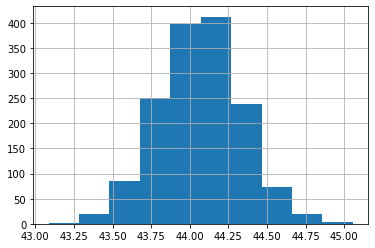

In [178]:
# Aproximadamente uma distribuição normal

amostras.mean().hist()
plt.show()

In [179]:
# Média população

df['Idade'].mean()

44.07142113482561

In [180]:
# Média amostral

amostras.mean().mean()

44.0656056666667

In [181]:
# Desvio padrão das médias amostrais

amostras.mean().std()

0.26886923112085126

In [182]:
df['Idade'].std()

12.480583465360187

In [183]:
# Desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra

df['Idade'].std() / np.sqrt(n)

0.2790743302740527

#### Níveis de confiança e significância

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

#### Erro inferencial

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Intervalos de confiança

Estimativa intervalar

#### Intevalo de confiança para a média da população

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

In [184]:
# Média amostral

media_amostra = 5050
media_amostra

5050

In [185]:
# Nível de significância ( 𝛼 )

significancia = 0.05
significancia

0.05

In [186]:
# Nível de confiança ( 1−𝛼 )


confianca = 1 - significancia
confianca

0.95

In [187]:
tabela_normal_padronizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


### Obtendo $z$

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

In [188]:
# Área cinza

0.95 / 2

0.475

In [189]:
# Calculando a área sobre a curva normal a partir de z até o final

0.5 + (0.95 / 2)

0.975

In [190]:
 # Verificando a partir da tabela padronizada

z = 1.9 + 0.06
z

1.96

In [191]:
# Obtendo o z a partir do scipy

z = norm.ppf(0.975)
round(z, 3)

1.96

### Valores de $z$ para os níveis de confiança mais utilizados

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

### Obtendo $\sigma_\bar{x}$

In [192]:
desvio_padrao = 150
desvio_padrao

150

In [193]:
# Amostra com 20 sacos

n = 20
n

20

In [194]:
raiz_n = np.sqrt(n)
raiz_n

4.47213595499958

In [195]:
sigma = desvio_padrao / raiz_n
sigma

33.54101966249684

### Obtendo $e$

In [196]:
# Erro inferencial

e = z * sigma
e

65.73919054324361

#### Solução 1 - Calculando o intervalo de confiança para a média

In [197]:
# Intervalo de confiança
# Probabilidade de 95% de o parametro da população estar dentro desse intervalo
#Limite inferior (-) e superior (+)

intervalo = (
    media_amostra - e,
    media_amostra + e
)

intervalo

(4984.260809456757, 5115.739190543243)

#### Solução 2 - Calculando o intervalo de confiança para a média

In [198]:
norm.interval(alpha=0.95, loc=media_amostra, scale = sigma)

(4984.260809456757, 5115.739190543243)

Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.

In [199]:
desvio_padrao = 6
n = 50
confianca = 0.95

In [200]:
raiz_n = np.sqrt(n)
raiz_n

7.0710678118654755

In [201]:
sigma = desvio_padrao / raiz_n
sigma

0.848528137423857

In [202]:
# Margem de erro

e = z * sigma
e

1.6630845892196133

Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão igual a 11, resultou em uma média amostral de 28.

Qual o intervalo de confiança de 90% para a média populacional?

In [203]:
n = 1976
desvio_padrao = 11
media_amostral = 28

sigma = desvio_padrao / np.sqrt(n)

norm.interval(alpha=0.90, loc=media_amostral, scale = sigma)

(27.592969951356466, 28.407030048643534)

## Calculando o tamanho da amostra

#### Variáveis quantitativas e população infinita

Erro inferencial

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão conhecido

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Com desvio padrão desconhecido

## $$n = \left(z\frac{s}{e}\right)^2$$

Onde:

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

### <font color='red'>Observações</font>

1. O desvio padrão ($\sigma$ ou $s$) e o erro ($e$) devem estar na mesma unidade de medida.

2. Quando o erro ($e$) for representado em termos percentuais, deve ser interpretado como um percentual relacionado à média.

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

In [204]:
0.5 + (0.95/2)

0.975

In [205]:
# Desvio padrão conhecido

z = norm.ppf(0.975)
z

1.959963984540054

In [206]:
# Obtendo Sigma

sigma = 3323.39
sigma

3323.39

In [207]:
# Obtendo erro inferencial

e = 100
e

100

In [208]:
# Números de elementos na amostra

n = (z * (sigma / e)) ** 2
round(n)

4243

O valor do gasto médio dos clientes de uma loja de conveniência é de 45,50. Assumindo que o desvio padrão dos gastos é igual a R$ 15,00, qual deve ser o tamanho da amostra para estimarmos a média populacional com um nível de significância de 10%?

Considere que o erro máximo aceitável seja de 10%.

In [209]:
significancia = 0.10
confianca = 1 - significancia
confianca

0.9

In [210]:
z = norm.ppf(0.95)
z

1.6448536269514722

In [211]:
sigma = 15
sigma

15

In [212]:
erro_percentual = 0.10
media = 45.5

e = media * erro_percentual

e

4.55

In [213]:
# Números de elementos na amostra

n = (z * (sigma / e)) ** 2
round(n)

29

#### Variáveis quantitativas e população finita

#### Com desvio padrão conhecido

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Com desvio padrão desconhecido

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Onde:

$N$ = tamanho da população

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

In [214]:
# tamanho populaçao 

N = 10000
N

10000

In [215]:
# Valor para 95 %

z = norm.ppf(0.975)
z

1.959963984540054

In [216]:
# desvio padrão amostral

s = 12
s

12

In [217]:
# erro inferencial

e = 5
e

5

In [218]:
# Obtendo N

n = ((z ** 2) * (s ** 2) * N ) / ((z ** 2) * (s ** 2) + ((e ** 2) * (N - 1)))
round(n)     

22

Um fabricante de farinha verificou que, em uma amostra aleatória formada por 200 sacos de 25 kg de um lote formado por 2.000 sacos, apresentou um desvio padrão amostral do peso igual a 480 g.

Considerando um erro máximo associado à média populacional igual a 0,3 kg e um nível de confiança igual a 95%, qual tamanho de amostra deveria ser selecionado para obtermos uma estimativa confiável do parâmetro populacional?

In [219]:
N = 2000
z = norm.ppf(0.975)
s = 0.480
e = 0.3

n = ((z ** 2) * (s ** 2) * N ) / ((z ** 2) * (s ** 2) + ((e ** 2) * (N - 1)))
round(n)   

10

## Fixando o conteúdo

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79** e que a **média populacional** é de **R$\$$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

In [220]:
renda_5000 = df.query("Renda <= 5000")["Renda"]

renda_5000.head()

0     800
1    1150
2     880
3    3500
4     150
Name: Renda, dtype: int64

In [221]:
sigma = renda_5000.std()
sigma

1082.794549030635

In [222]:
media = renda_5000.mean()
media

1426.5372144947232

In [223]:
# Calculando tamanho da amostra

z = norm.ppf(0.975)
e = 10
n = (z * (sigma) / e) ** 2
round(n)

45039

In [224]:
# Calculando intervalo de confiança para a média

intervalo = norm.interval(alpha = 0.95,  loc = media, scale = sigma / np.sqrt(n))
intervalo

(1416.5372144947232, 1436.5372144947232)